# A feed-forward neural network

Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5140 - loss: 1.0076 - val_accuracy: 0.5260 - val_loss: 0.7092
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.5635 - loss: 0.6762 - val_accuracy: 0.5650 - val_loss: 0.6745
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.5859 - loss: 0.6712 - val_accuracy: 0.5690 - val_loss: 0.6722
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5778 - loss: 0.6731 - val_accuracy: 0.5820 - val_loss: 0.6699
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.5819 - loss: 0.6717 - val_accuracy: 0.5840 - val_loss: 0.6722
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6049 - loss: 0.6549 - val_accuracy: 0.5810 - val_loss: 0.6703
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5918 - loss: 0.6618 - val_accuracy: 0.5690 - val_loss: 0.6728
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6119 - loss: 0.6539 - val_accuracy: 0.5900 - v

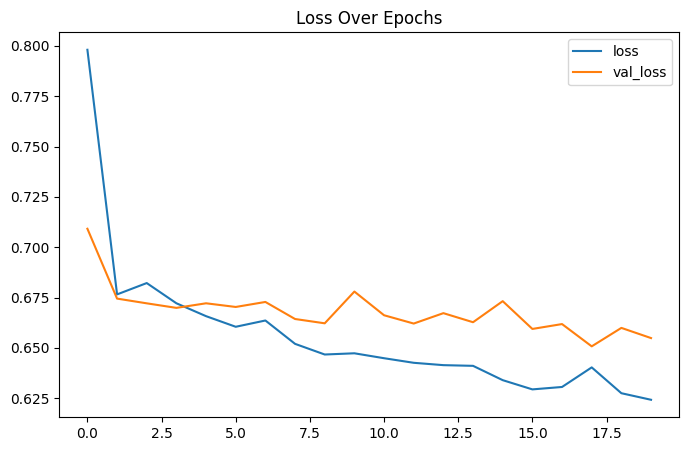

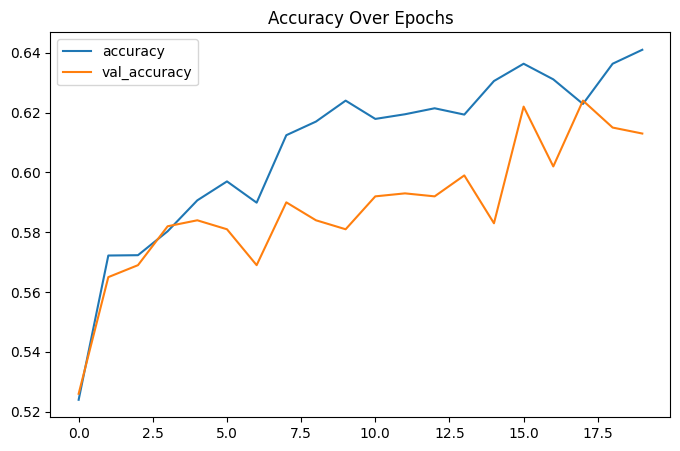

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


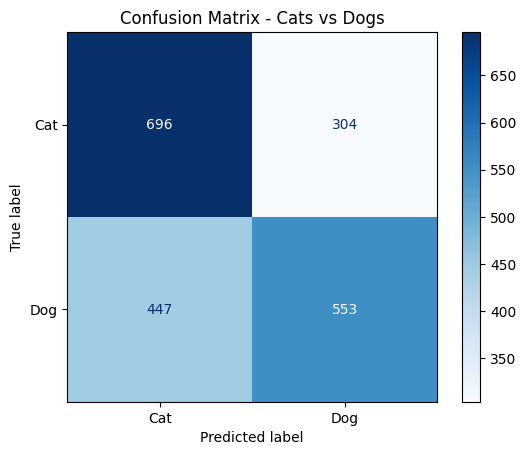

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# 1. Load CIFAR-10 and filter for cats (3) and dogs (5)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()

mask_train = np.isin(y_train, [3, 5])
mask_test  = np.isin(y_test, [3, 5])
x_train, y_train = x_train[mask_train], y_train[mask_train]
x_test, y_test   = x_test[mask_test],   y_test[mask_test]

# Map labels: cat → 0, dog → 1
y_train = (y_train == 5).astype('int32')
y_test  = (y_test  == 5).astype('int32')

# 2. Preprocess: Normalize and flatten images
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0
x_train = x_train.reshape(-1, 32*32*3)
x_test  = x_test.reshape(-1, 32*32*3)

# 3. Build feed-forward model
model = models.Sequential([
    layers.Input(shape=(32*32*3,)),         # Flattened input
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(2)                         # Two outputs: cat vs. dog
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 4. Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

# 5. Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# 7.1. Plot training history
import pandas as pd, matplotlib.pyplot as plt
hist_df = pd.DataFrame(history.history)
hist_df[['loss','val_loss']].plot(title='Loss Over Epochs', figsize=(8,5)); plt.show()
hist_df[['accuracy','val_accuracy']].plot(title='Accuracy Over Epochs', figsize=(8,5)); plt.show()

# 7.2. Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Reshape x_test to match the expected input shape of the model
x_test_reshaped = x_test.reshape(-1, 32*32*3)
y_pred = np.argmax(model.predict(x_test_reshaped), axis=1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Cat','Dog'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Cats vs Dogs'); plt.show()


# A back propagation neural network

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
# 1. Load CIFAR-10 and filter cats vs. dogs
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()  # :contentReference[oaicite:5]{index=5}
y_train, y_test = y_train.flatten(), y_test.flatten()
mask_train = np.isin(y_train, [3,5]); mask_test = np.isin(y_test, [3,5])
x_train, y_train = x_train[mask_train], y_train[mask_train]
x_test, y_test   = x_test[mask_test],   y_test[mask_test]
y_train = (y_train == 5).astype('int32'); y_test = (y_test == 5).astype('int32')
# 2. Preprocess: Normalize & flatten
x_train = x_train.astype('float32')/255.0; x_test = x_test.astype('float32')/255.0  # :contentReference[oaicite:6]{index=6}
x_train = x_train.reshape(-1, 32*32*3); x_test = x_test.reshape(-1, 32*32*3)
# 3. Build the model
model = models.Sequential([
    layers.Input(shape=(32*32*3,)),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(2)       # logits
])  # :contentReference[oaicite:7]{index=7}
# 4. Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
# 5. Train
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)
# 6. Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


Epoch 1/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.5168 - loss: 1.0989 - val_accuracy: 0.5790 - val_loss: 0.6741
Epoch 2/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5864 - loss: 0.6698 - val_accuracy: 0.5300 - val_loss: 0.7292
Epoch 3/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.5636 - loss: 0.6921 - val_accuracy: 0.5810 - val_loss: 0.6689
Epoch 4/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5814 - loss: 0.6817 - val_accuracy: 0.5630 - val_loss: 0.6763
Epoch 5/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6035 - loss: 0.6580 - val_accuracy: 0.5850 - val_loss: 0.6653
Epoch 6/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.5922 - loss: 0.6591 - val_accuracy: 0.6040 - val_loss: 0.6598
Epoch 7/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.6132 - loss: 0.6471 - val_accuracy: 0.5940 - val_loss: 0.6608
Epoch 8/20
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.6008 - loss: 0.6570 - val_accuracy: 0.5720 - v

Learning rate:  0.001
Epoch 1/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 12s 111ms/step - accuracy: 0.5482 - loss: 0.8246 - val_accuracy: 0.5705 - val_loss: 0.8809 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 2/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.5608 - loss: 0.7139 - val_accuracy: 0.5845 - val_loss: 0.7212 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 3/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.5761 - loss: 0.6996 - val_accuracy: 0.6150 - val_loss: 0.6654 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 4/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 11s 118ms/step - accuracy: 0.5995 - loss: 0.6775 - val_accuracy: 0.5860 - val_loss: 0.7924 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 5/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.5937 - loss: 0.6768 - val_accuracy: 0.6210 - val_loss: 0.6527 - learning_rate: 0.0010
Learning rate:  0.001
Epoch 6/30
79/79 ━━━━━━━━━━━━━━━━━━━━ 10s 105ms/step - accuracy: 0.6007 - loss: 0.6599 - val_accuracy: 0

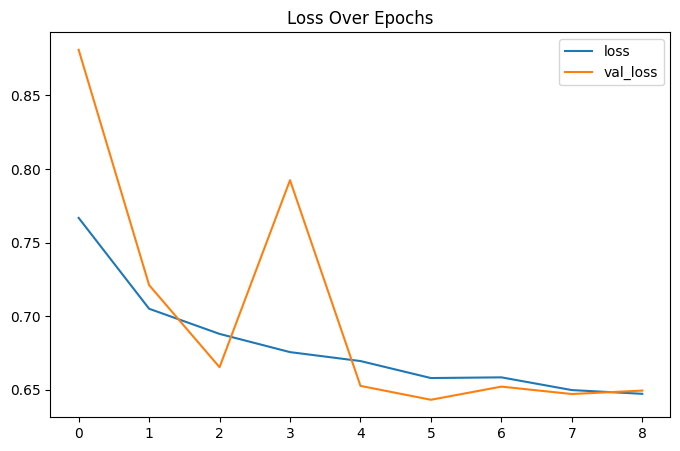

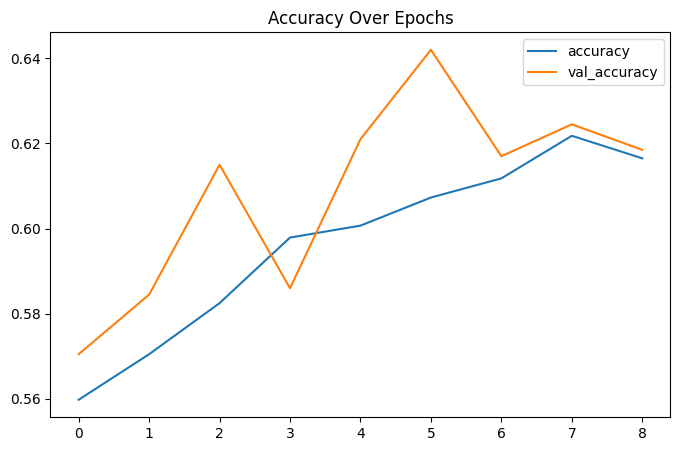

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6373 - loss: 0.6474
Test accuracy: 0.6420


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import numpy as np

# 1. Load & Filter CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train, y_test = y_train.flatten(), y_test.flatten()
mask_train = np.isin(y_train, [3,5]); mask_test = np.isin(y_test, [3,5])
x_train, y_train = x_train[mask_train], (y_train[mask_train]==5).astype('int32')
x_test,  y_test  = x_test[mask_test],  (y_test[mask_test]==5).astype('int32')

# 2. Data Augmentation
data_augment = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# 3. Preprocess: normalize & flatten
def preprocess(x, y):
    x = tf.cast(x, tf.float32)/255.0
    x = tf.reshape(x, (-1, 32*32*3))
    return x, y

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(5000).batch(128)
train_ds = train_ds.map(lambda x,y: (data_augment(x), y)).map(preprocess).prefetch(1)
test_ds  = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(128).map(preprocess)

# 4. Model with Dropout & BatchNorm
model = models.Sequential([
    layers.Input(shape=(32*32*3,)),
    layers.Dense(1024, activation=None),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.3),

    layers.Dense(512, activation=None),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.3),

    layers.Dense(256, activation=None),
    layers.BatchNormalization(),
    layers.ReLU(),
    layers.Dropout(0.2),

    layers.Dense(2)  # logits
])

# 5. Compile with LR Scheduler
# Remove the learning rate schedule from the optimizer definition
model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # Remove learning_rate=lr_schedule
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# 6. Callbacks
def lr_schedule(epoch):
  """Learning Rate Schedule

  Learning rate is scheduled to be reduced after 80, 120, 160, 180 epochs.
  Called automatically every epoch as part of callbacks during training.

  # Arguments
      epoch (int): The number of epochs

  # Returns
      lr (float32): learning rate
  """
  lr = 1e-3
  if epoch > 180:
    lr *= 0.5e-3
  elif epoch > 160:
    lr *= 1e-3
  elif epoch > 120:
    lr *= 1e-2
  elif epoch > 80:
    lr *= 1e-1
  print('Learning rate: ', lr)
  return lr
# Add LearningRateScheduler callback to manage the learning rate
cb = [
    callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2),
    callbacks.LearningRateScheduler(lr_schedule)  # Add this line
]

# 7. Train & Evaluate
history = model.fit(train_ds, epochs=30, validation_data=test_ds, callbacks=cb)

# 7.1. Plot training history
import pandas as pd, matplotlib.pyplot as plt
hist_df = pd.DataFrame(history.history)
hist_df[['loss','val_loss']].plot(title='Loss Over Epochs', figsize=(8,5)); plt.show()
hist_df[['accuracy','val_accuracy']].plot(title='Accuracy Over Epochs', figsize=(8,5)); plt.show()

test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


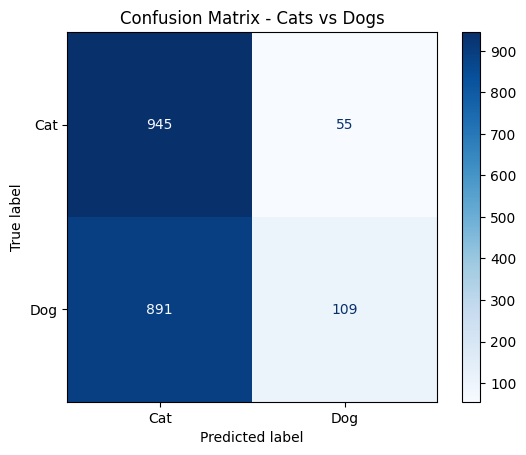

In [ ]:
# 7.2. Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Reshape x_test to match the expected input shape of the model
x_test_reshaped = x_test.reshape(-1, 32*32*3)
y_pred = np.argmax(model.predict(x_test_reshaped), axis=1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Cat','Dog'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Cats vs Dogs'); plt.show()

In [ ]:
#End